# Analysis of the protocols of the Presidential Election in Belarus 2020

Thanks to the joint work of the "[Honest People](https://honest-people.by)", "[Zubr](https://zubr.in/)" and "[Voice](https://belarus2020.org/home)" platforms, it was possible to obtain and process the final protocols of **1,310** polling stations out of **5,767** throughout Belarus. This analysis was carried out on the basis of these protocols.

> **Processed data and photos of the protocols [under the link](https://drive.google.com/file/d/1tMYku50vb6jBawXXrj2SRRHlRi_OA_vy/view)**

## Disclaimer 
There are a lot of direct evidence of fraud in the 2020 elections in Belarus:
1. audio where [district head](https://web.archive.org/web/20210211234117/https://news.tut.by/society/696465.html) forces teachers to change the protocol after the elections are over.
2. in [this video](https://www.youtube.com/watch?v=53n8WemV0tM) people in plain clothes convince them to put up the "correct" protocol for citizens, not the real one.
3. [a report from the "Golos" platform](https://drive.google.com/file/d/1kSprtBUUtS1vb-W_jc4QJkPkoZPJBWxd/view), which proves falsifications at every third polling station.

🚫 Therefore, it is highly likely that the **data presented in the current dataset is falsified**. Nevertheless, it can be used to analyze the scale and nature of the falsifications, and, of course, this information is of critical historical importance.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
elections = pd.read_excel('elections_EN.xlsx')

In [3]:
# choose meaningful data
columns = ['Region', 'City', 'Address', 'Total number of voters',
           'Number of voters who took part in the vote', 'Number of voters who took part in early voting', 
           'Dmitriev', 'Konopackaya', 'Lukashenko', 'Tsikhanouskaya', 'Cherechen']

rename_dict = {
            "Total number of voters": "all_voters",
            "Number of voters who took part in the vote": "voted",
            "Number of voters who took part in early voting": "early_voters"}

votes = pd.DataFrame(elections[columns])
votes.rename(inplace=True, columns=rename_dict)
votes.head()

,Region,City,Address,all_voters,voted,early_voters,Dmitriev,Konopackaya,Lukashenko,Tsikhanouskaya,Cherechen
0,Брестская,Брест,"ул. Гоголя, 7, УО «Брестский государственный м...",1656.0,1319,252.0,21.0,16,464,701,16.0
1,Брестская,Брест,"ул. Героев обороны Брестской крепости, 78, УО ...",2646.0,2249,707.0,43.0,25,994,948,32.0
2,Брестская,Брест,"ул. Пригородная, 25, УО «Брестское государстве...",1805.0,1714,537.0,32.0,26,1125,395,24.0
3,Брестская,Брест,"ул. Смирнова, 21, общежитие ОАО «Брестский мяс...",2270.0,2122,863.0,42.0,21,1506,412,50.0
4,Брестская,Брест,"ул. Смирнова, 63, ГУО «Средняя школа № 5 г. Бр...",2746.0,2383,507.0,53.0,28,923,1157,48.0


In [4]:
# let's calculate some informative data
votes["turnout"] = round(votes["voted"] / votes['all_voters'], 5)
votes["svetlana_%"] = round(votes["Tsikhanouskaya"] / votes['voted'], 5) # percentage of votes for Svetlana Tsikhanouskaya
votes["luka_%"] = round(votes["Lukashenko"] / votes['voted'], 5) # percentage of votes for dictator 
votes["early_voters_%"] = round(votes["early_voters"] / votes['all_voters'], 5)

### Each dot is a polling station. The color defines the candidate

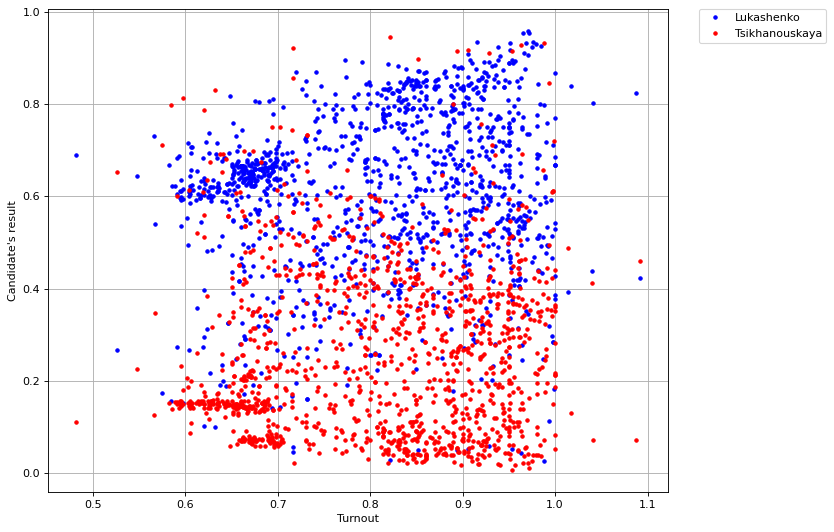

In [8]:
draw_dots(votes)

### Such ☝️ spread of values indicates confused, random falsifications.
Since one **polling station** (~2000 voters) is already a **good election model** by itself:
* Belarus is highly urbanized, there are no pronounced rural regions
* there is no strong property/financial stratification of society
* among ~2000 voters there will be a worker, a teacher, a sole proprietor, a sales clerk, a manager – all social groups
* the exception may be the polling stations in military units, etc.

Therefore, in theory, the precincts should **NOT differ** significantly in their preferences (**candidates' results**) and **appearance**.

**For example**: the picture below shows the situation at the presidential elections in Russia in '96. Each point is a polling station. Here, the turnout (at all polling stations in Moscow) is about the same and the distribution of votes (4 clearly visible clusters on the right of the diagram) is almost the same at all the polling stations

<img src="https://imgur.com/jbBQRJH.jpg" style="width: 700px;"/> 

#### A funny difference in the behavior of voters in regional centers

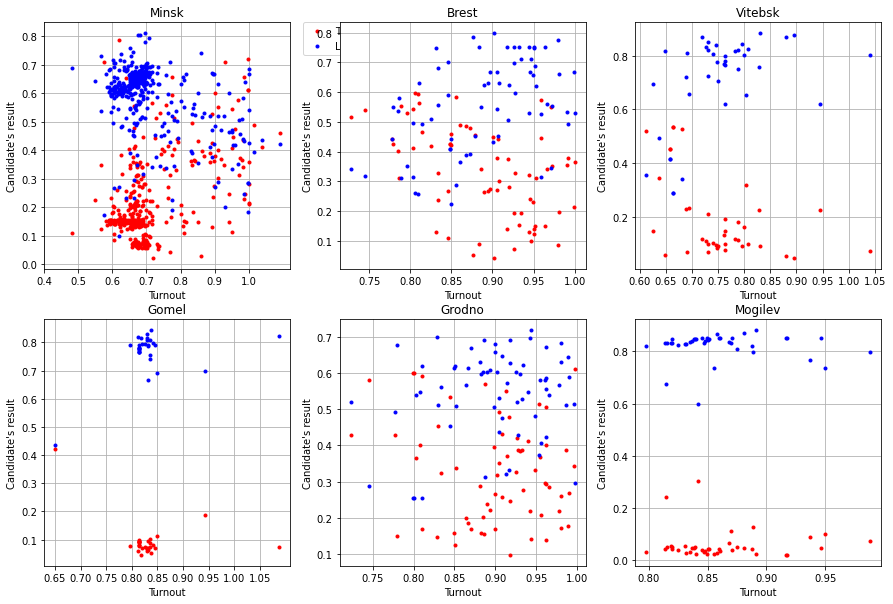

In [9]:
minsk_city = votes[votes['City'] == 'Минск']
brest_city = votes[votes['City'] == 'Брест']
vitebsk_city = votes[votes['City'] == 'Витебск']
gomel_city = votes[votes['City'] == 'Гомель']
grodno_city = votes[votes['City'] == 'Гродно']
mogilev_city = votes[votes['City'] == 'Могилев']

city_data = [minsk_city, brest_city, vitebsk_city, gomel_city, grodno_city, mogilev_city]
labels = ['Minsk', 'Brest', 'Vitebsk', 'Gomel', 'Grodno', 'Mogilev']

draw_regions(city_data, labels)

### In Mogilev the turnout is strictly over 80%🥸

### In the regions (excluding regional centers) the differences are not so noticeable

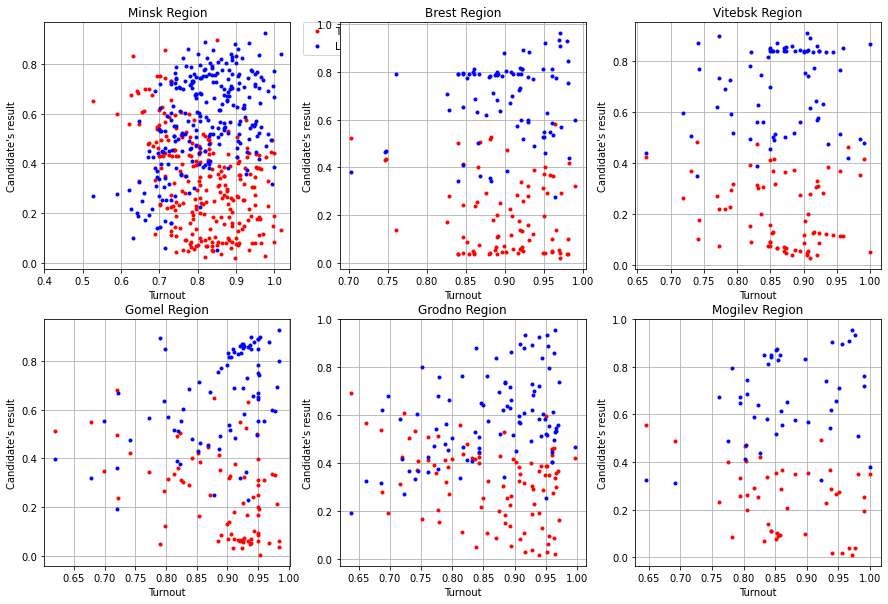

In [10]:
regions_data = [votes[(votes['City'] != 'Минск') & (votes['Region'] == 'Минская')],
             votes[(votes['City'] != 'Брест') & (votes['Region'] == 'Брестская')],
             votes[(votes['City'] != 'Витебск') & (votes['Region'] == 'Витебская')],
             votes[(votes['City'] != 'Гомель') & (votes['Region'] == 'Гомельская')],
             votes[(votes['City'] != 'Гродно') & (votes['Region'] == 'Гродненская')],
             votes[(votes['City'] != 'Могилев') & (votes['Region'] == 'Могилевская')]]

labels = ['Minsk Region', 'Brest Region', 'Vitebsk Region', 'Gomel Region', 'Grodno Region', 'Mogilev Region']

draw_regions(regions_data, labels)

### ❗️ But these graphs ☝️ show a "throw-in for one candidate" falsification scheme

<img src="https://imgur.com/PivxMmZ.jpg" style="width: 500px;"/> 

### When the riggers simply toss one candidate's ballot into the ballot box, the turnout goes up, and the results of the other candidates slide down 💁

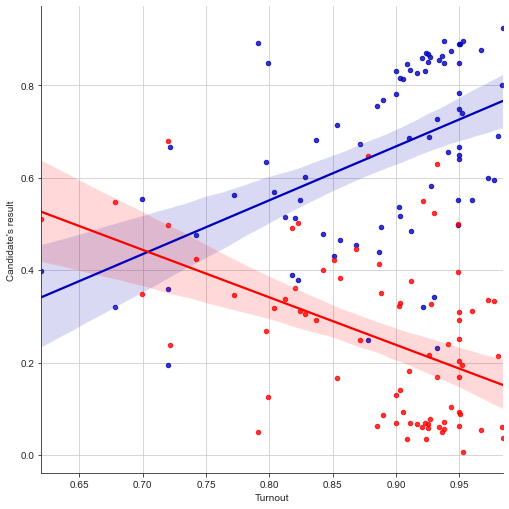

In [25]:
gomelskaya = votes[(votes['City'] != 'Гомель') & (votes['Region'] == 'Гомельская')]
draw_regression_plot(gomelskaya)

### Approximately the same picture in all regions:

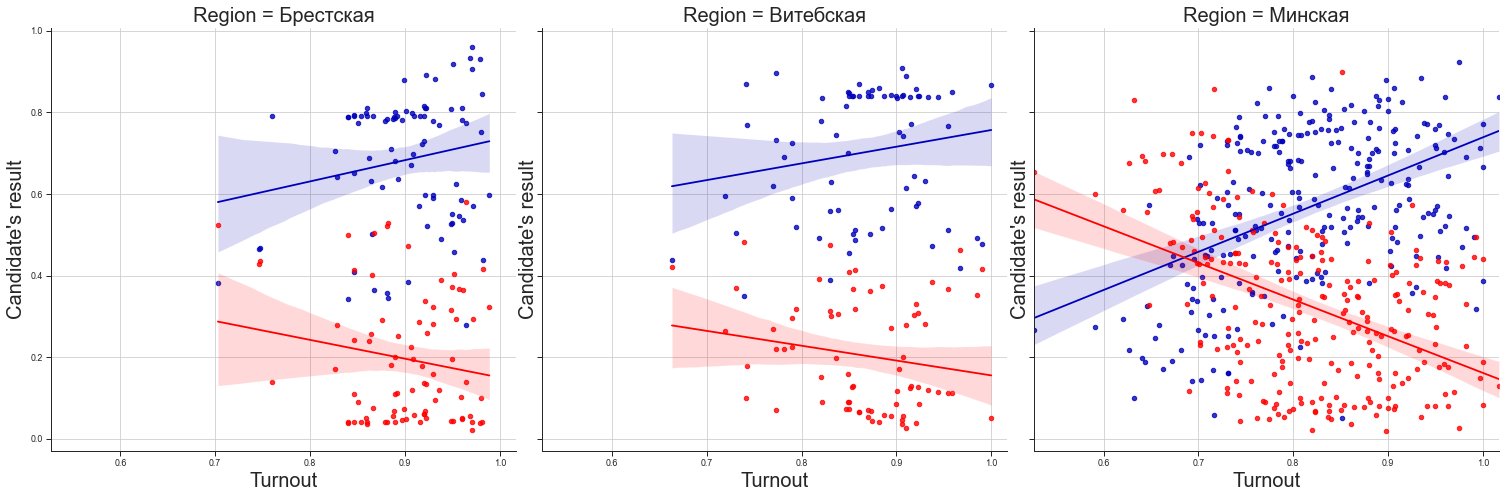

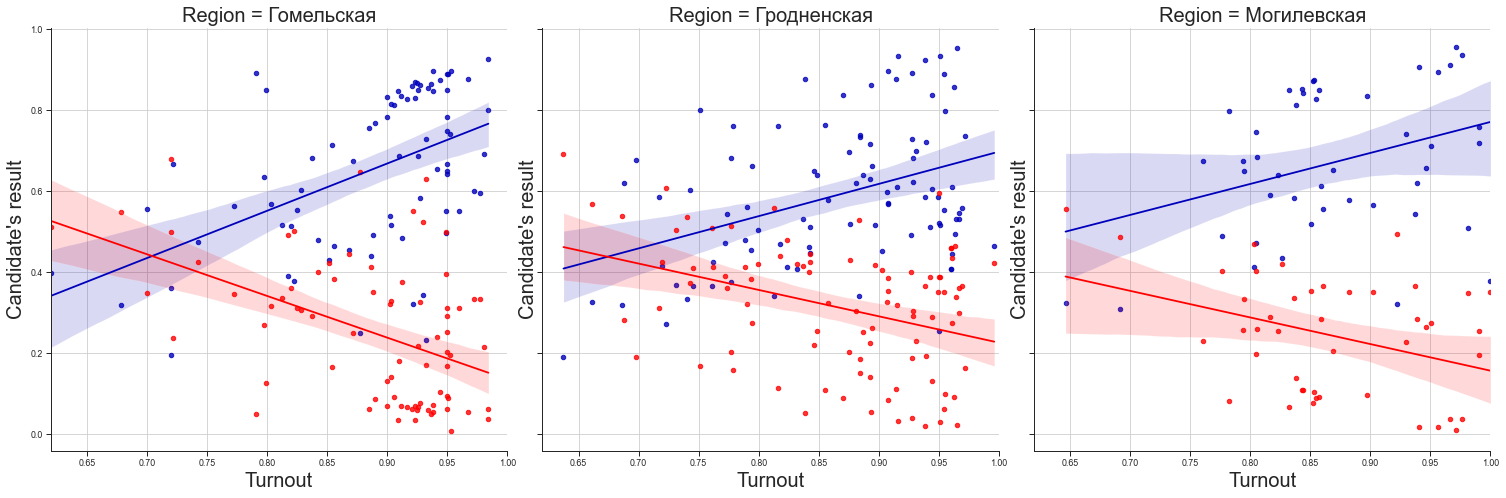

In [28]:
draw_regressions_plots(votes)

### For comparison, at all the polling stations in the embassies of Belarus (except for the embassies in St. Petersburg, Moscow and Istanbul) Svetlana won and there is such a picture:

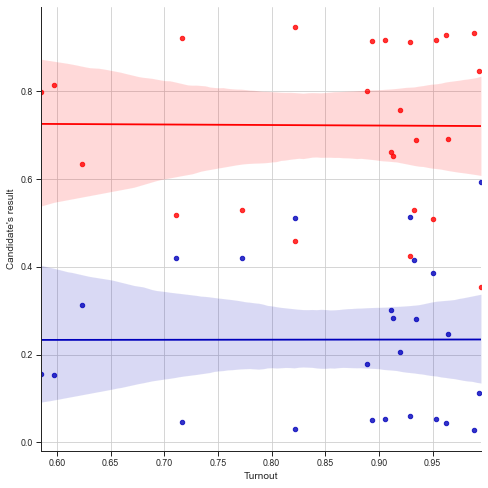

In [29]:
international_df = votes[(votes['Region'] == 'Минск') & (votes['City'] != 'Минск')]
draw_regression_plot(international_df)

### You can see that the result of the candidate does not depend on turnout 🦸

In [14]:
# sites outside Belarus (in embassies around the world)
international_df[['City', 'Tsikhanouskaya', 'Lukashenko',
                  'svetlana_%', 'luka_%']].sort_values('svetlana_%', ascending=False).head(7)

,City,Tsikhanouskaya,Lukashenko,svetlana_%,luka_%
1023,"Вашингтон, США",419,13,0.94582,0.02935
1024,"Нью-Йорк, США",959,28,0.93288,0.02724
1018,"Гаага, Нидерланды",385,18,0.92771,0.04337
1028,"Прага, Чехия",447,22,0.92165,0.04536
1011,"Мюнхен, Германия",786,45,0.91715,0.05251
1012,"Тель-Авив, Израиль",447,26,0.91598,0.05328
1010,"Берлин, Германия",1036,57,0.91439,0.05031


### Outside of Belarus the onion "won" only in three cities: Moscow, St. Petersburg, Istanbul

In [15]:
international_df[['City', 'Tsikhanouskaya', 'Lukashenko',
                  'svetlana_%', 'luka_%']][international_df['svetlana_%'] < international_df['luka_%']]

,City,Tsikhanouskaya,Lukashenko,svetlana_%,luka_%
1020,"Москва, Россия",1663,2018,0.42380,0.51427
1021,"Санкт-Петербург, Россия",351,392,0.45822,0.51175
1025,"Стамбул, Турция",73,122,0.35437,0.59223


### Distribution of those who voted on early voting days

Text(0.5, 1.0, '% of those who voted on early voting days')

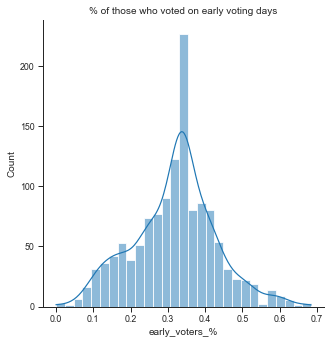

In [36]:
sns.displot(votes["early_voters_%"], kde=True)
plt.title("% of those who voted on early voting days")

# votes['early_voters_%'].value_counts(bins=15)

### Not much like a normal distribution 🤓

### Graph of the "Turnout - Number of Votes for a Candidate" Relationship

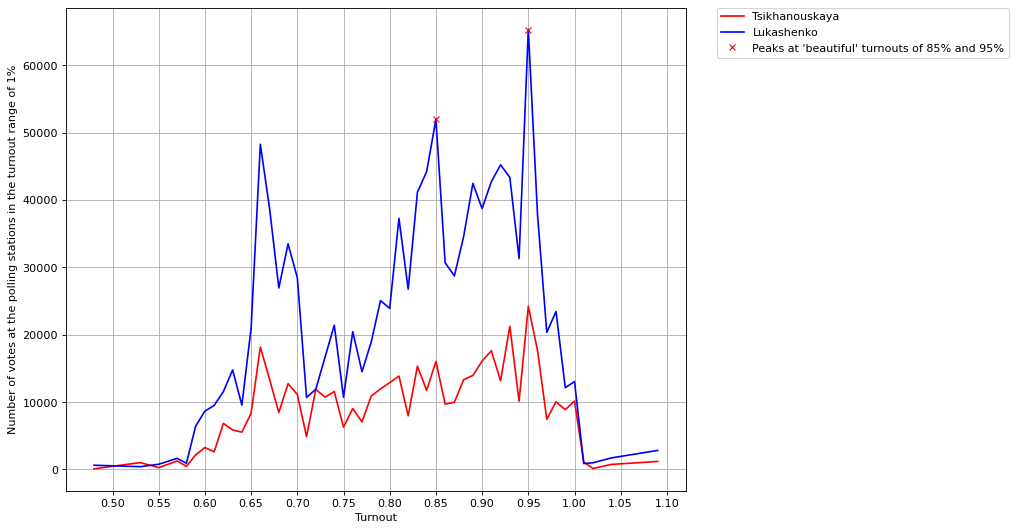

In [19]:
# Round up the turnout to a percentage (0.85, instead of 0.84996)
votes["turnout_rounded"] = round(votes["turnout"], 2)

grouped = votes.groupby(['turnout_rounded']).sum()
draw_grouped_plot(grouped)

#grouped.sort_values('Lukashenko', ascending=False).head()

### Chaos and no patterns, and the saws are evidence of fraud. And you can see that the onion "took" a lot of votes in precincts with a nice 95% and 85% turnout

### Distribution of the last digits in the protocol results (2418 numbers)
We take all 3 and 4-digit numbers from the protocol (columns that contain votes for candidates), select the last digit and count how many times it occurs. **There is an unnatural outlier on 1️⃣**.

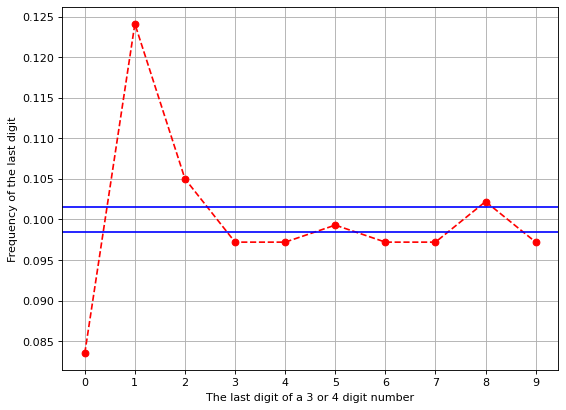

In [20]:
last_number_distribution(votes)

### Regions with the most wins for Svetlana Tsikhanouskaya
There are 195 protocols with Svetlana's wins in total

In [21]:
sveta_win_df = votes[votes["Tsikhanouskaya"] > votes["Lukashenko"]]
sveta_win_df.Region.value_counts()

Минская        62
Минск          53
Гродненская    29
Брестская      27
Гомельская     11
Витебская       9
Могилевская     4
Name: Region, dtype: int64

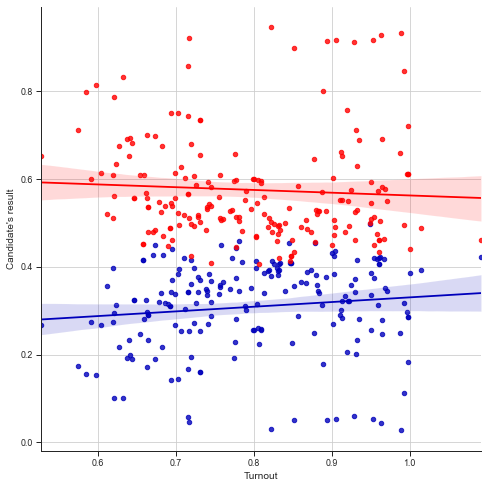

In [30]:
draw_regression_plot(sveta_win_df)

### Where does Luka have less than 20%?

In [22]:
votes[['City', 'voted', 'Tsikhanouskaya', 'Lukashenko', 'svetlana_%', 'luka_%']][votes['luka_%'] < 0.2].sort_values(by='svetlana_%')

,City,voted,Tsikhanouskaya,Lukashenko,svetlana_%,luka_%
1112,Минск,2061,1226,394,0.59486,0.19117
315,Жлобин,1773,1205,346,0.67964,0.19515
696,д. Боровляны,1538,1048,291,0.68140,0.18921
469,Лида,1192,825,228,0.69211,0.19128
743,п. Сухорукие,679,470,135,0.69219,0.19882
709,аг. Лесной,1231,860,235,0.69862,0.19090
711,аг. Лесной,1409,985,242,0.69908,0.17175
1156,Минск,1193,848,207,0.71081,0.17351
1041,Минск,2396,1725,438,0.71995,0.18280
713,аг. Лесной,1737,1274,279,0.73345,0.16062


In [5]:
def draw_dots(df):
    l = 10
    h = 8
    
    plt.figure(figsize=(l, h), dpi=80)

    plt.plot(df["turnout"], df["luka_%"], 'b.', label="Lukashenko")
    plt.plot(df["turnout"], df["svetlana_%"] , 'r.', label="Tsikhanouskaya")

    plt.xlabel('Turnout')
    plt.ylabel("Candidate's result")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    
    #plt.xticks(np.arange(0.5, 1.1, 0.05))
    plt.grid()

    plt.show()

In [32]:
def draw_grouped_plot(grouped):
    plt.figure(figsize=(10, 8), dpi=80)

    plt.plot(grouped['Tsikhanouskaya'], 'r', label="Tsikhanouskaya")
    plt.plot(grouped['Lukashenko'], 'b', label="Lukashenko")
    
    plt.plot(0.95, 65277, 'rx', label="Peaks at 'beautiful' turnouts of 85% and 95%")
    plt.plot(0.85, 51959, 'rx')

    plt.xlabel('Turnout')
    plt.ylabel('Number of votes at the polling stations in the turnout range of 1%')

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xticks(np.arange(0.5, 1.1, 0.05))
    
    sns.set_style("ticks",{'axes.grid': False})
    plt.grid()

    plt.show()

In [6]:
def draw_regions(dfs, labels):
    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    plt.setp(axs, xticks=np.arange(0.4, 1.1, 0.05))
    plt.sca(axs[0, 0])
    
    for i, df in enumerate(dfs):
        row = i // 3
        col = i % 3
        
        axs[row, col].plot(df["turnout"], df["svetlana_%"] , 'r.', label="Tsikhanouskaya")
        axs[row, col].plot(df["turnout"], df["luka_%"], 'b.', label="Lukashenko")
        axs[row, col].set_title(labels[i])
        axs[row, col].grid()
        
        if labels[i].startswith('Minsk'):
            plt.xticks(np.arange(0.4, 1.1, 0.1))
            
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    for ax in axs.flat:
        ax.set(xlabel='Turnout', ylabel="Candidate's result")

In [31]:
def last_number_distribution(df):
    columns = ['Dmitriev', 'Konopackaya', 'Lukashenko', 'Tsikhanouskaya', 'Cherechen']
    m = {}
    hist = []

    for column in columns:
        for n in df[column].values:
            if n/100 >= 1:
                x = int(n%10)
                m[x] = m.get(x, 0) + 1
                hist.append(x)

    summa = sum(m.values())

    m.update((x, round(y/summa, 4)) for x, y in m.items())
    m = sorted(m.items())
    x, y = zip(*m) # unpack a list of pairs into two tuples


    plt.figure(figsize=(8, 6), dpi=80)
    plt.plot(x, y, 'r', linestyle='--', marker='o')
    plt.xticks(np.arange(min(x), max(x)+1, 1.0))
    plt.xlabel('The last digit of a 3 or 4 digit number')
    plt.ylabel('Frequency of the last digit')

    sns.set_style("ticks",{'axes.grid': False})
    plt.grid()
    plt.axhline(y=0.0985, color='b', linestyle='-')
    plt.axhline(y=0.1015, color='b', linestyle='-')
    plt.show()

In [27]:
def draw_regressions_plots(df):
    svet_df = df[['turnout', 'svetlana_%', 'Region', 'City']]
    svet_df = svet_df.rename({'svetlana_%': "Candidate's result"}, axis=1) 
    svet_df['is_svetlana'] = 1

    luka_df = df[['turnout', 'luka_%', 'Region', 'City']]
    luka_df = luka_df.rename({'luka_%': "Candidate's result"}, axis=1) 
    luka_df['is_svetlana'] = 0

    data = pd.concat([svet_df, luka_df]).reset_index(drop=True)
    
    data1 = data[((data['City'] != 'Минск') & (data['Region'] == 'Минская'))
                 | ((data['City'] != 'Брест') & (data['Region'] == 'Брестская')) 
                 | ((data['City'] != 'Витебск') & (data['Region'] == 'Витебская'))]
    data2 = data[((data['City'] != 'Гомель') & (data['Region'] == 'Гомельская'))
                 | ((data['City'] != 'Гродно') & (data['Region'] == 'Гродненская'))
                 | ((data['City'] != 'Могилев') & (data['Region'] == 'Могилевская'))]
    
    sns.set_context("paper", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":20})  

    fig1 = sns.lmplot(x="turnout", y="Candidate's result",
                   hue="is_svetlana", col='Region', data=data1, height=7,
                   palette=['#0000bb', '#ff0000'], legend=False, scatter_kws={"s": 20}, col_wrap=3)
    fig1.set(xlabel='Turnout', ylabel="Candidate's result")
    
    fig2 = sns.lmplot(x="turnout", y="Candidate's result",
                   hue="is_svetlana", col='Region', data=data2, height=7,
                   palette=['#0000bb', '#ff0000'], legend=False, scatter_kws={"s": 20})
    fig2.set(xlabel='Turnout', ylabel="Candidate's result")
    
    
    sns.set_context("paper", rc={"font.size":20,"axes.titlesize":10,"axes.labelsize":10})  

In [24]:
def draw_regression_plot(df):
    svet_df = df[['turnout', 'svetlana_%', 'Region', 'City']]
    svet_df = svet_df.rename({'svetlana_%': 'Percentage of votes'}, axis=1) 
    svet_df['is_svetlana'] = 1

    luka_df = df[['turnout', 'luka_%', 'Region', 'City']]
    luka_df = luka_df.rename({'luka_%': 'Percentage of votes'}, axis=1) 
    luka_df['is_svetlana'] = 0

    data = pd.concat([svet_df, luka_df]).reset_index(drop=True)

    sns.set_style("ticks",{'axes.grid' : True})
    sns.lmplot(x="turnout", y="Percentage of votes",
                   hue="is_svetlana", data=data, height=7,
                   palette=['#0000bb', '#ff0000'], legend=False, scatter_kws={"s": 20})
    plt.xlabel('Turnout')
    plt.ylabel("Candidate's result")

In [42]:
df = pd.DataFrame({"Name" : ["Tom", "Mike", "Rick"],
                   "Age" : [25, 32, 54]}) 

def highlight_cols(x):
    df = x.copy()
    df['Age'] = 'background-color: lightgreen'
    return df 
  
#display(df.style.apply(highlight_cols, axis = None))

### «Использованная литература»

Анализ проведен по следам видео Савватеева "Разбор выборов с Сергеем Шпилькиным"
- Ссылка на видео: https://www.youtube.com/watch?v=AbAPzs3P2Yo&t=1s
- Материалы в видео: https://disk.yandex.ru/i/bgGIGT4iWkL0Hg
- Доклад об электронном голосовании в Москве: https://drive.google.com/file/d/1L9U2ssdjw_nRJMjBIzebhPDppfoWZgmJ/view

### Приложение (aka bonus track)

Джерриме́ндеринг — произвольная демаркация избирательных округов с целью искусственного изменения соотношения политических сил в них и, как следствие, в целом на территории проведения выборов. https://ru.wikipedia.org/wiki/Джерримендеринг.

Иллюстрация возможностей разделения на электоральные округа: хотя во всех случаях в выборах участвуют 36 зелёных и 28 фиолетовых избирателей, число доставшихся кандидатам округов может равняться как 3:1 и 4:0 (слева), так и 2:2 и даже 1:3 (справа) в зависимости от выбора разделения.

<img src="https://imgur.com/O6wES9M.jpg" style="width: 500px;"/>